In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# For the first part. First read image as opencv object and convert its type to numpy array

In [2]:
image = cv2.imread('group_1.jpg',0)
array = np.asarray(image)
rowmean = []
rowstd = []
colmean = []
colstd = []

# For each row and column means and standart devations are calculated.

In [3]:
for i in range (400):
    rowmean.append(image[i].mean())
    rowstd.append(image[i].std())
    colmean.append(image[:,i].mean())
    colstd.append(image[:,i].std());

# To calculate lower and upper control limits both for rows and columns

In [4]:
rowLCL = []
rowUCL = []
colLCL = []
colUCL = []
for i in range (400):
    rowLCL.append(rowmean[i] - 3*rowstd[i])
    rowUCL.append(rowmean[i] + 3*rowstd[i])
    colLCL.append(colmean[i] - 3*colstd[i])
    colUCL.append(colmean[i] + 3*colstd[i])



# For each row if pixel values are out of bounds, they are assigned as zero.

In [5]:
for i in range (400):
    for j in range (400):
        if(image[i,j]<rowLCL[i]):
            image[i,j] = 0
        if(image[i,j]>rowUCL[i]):
            image[i,j] = 0
cv2.imwrite( "row_converted.jpeg", image );

# First the image initialized again since the values were changed for the row operations. For each column if pixel values are out of bounds, they are assigned as zero.

In [6]:
image = cv2.imread('group_1.jpg',0)
for i in range (400):
    for j in range (400):
        if(image[i,j]<colLCL[i]):
            image[i,j] = 0
        if(image[i,j]>colUCL[i]):
            image[i,j] = 0
cv2.imwrite( "col_converted.jpeg", image );

# Plot the images

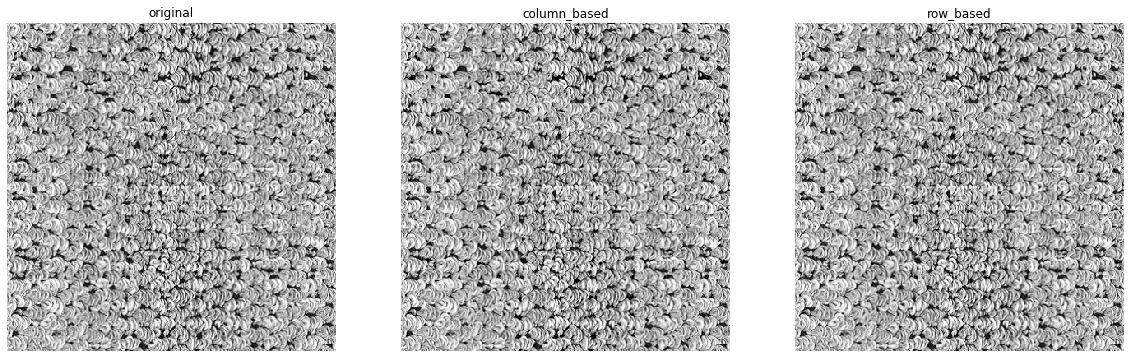

In [7]:
fig = plt.figure(figsize=(20,10))
original_fig = plt.subplot(131)
original_fig.set_title("original")
plt.axis("off")
col_converted_fig = plt.subplot(132)
col_converted_fig.set_title("column_based")
plt.axis("off")
row_converted_fig = plt.subplot(133)
row_converted_fig.set_title("row_based")
plt.axis("off")
original = cv2.imread("gray.jpeg")
col_converted = cv2.imread("col_converted.jpeg",0)
row_converted = cv2.imread("row_converted.jpeg",0)
original_fig.imshow(cv2.cvtColor(original,cv2.COLOR_BGR2RGB))
col_converted_fig.imshow(cv2.cvtColor(col_converted,cv2.COLOR_BGR2RGB))
row_converted_fig.imshow(cv2.cvtColor(row_converted,cv2.COLOR_BGR2RGB))
plt.show()

# To extract patches and get pixel informations. each x array represents the pixel values near the center pixels (x is an array with dimensions (121801,2600) where 121801 represents each patches and 2600 represents the pixels near the center pixel (51 * 51-1) and y is an array with dimension (2600) where it represents the center pixels of each patches)

In [8]:
original = cv2.imread('gray.jpeg',0)
patches = []
for i in range (349):
    for j in range (349):
        patches.append(original[i:51+i,j:51+j])

In [9]:
x = []
for i in range (len(patches)):
    x.append(patches[i].flatten())
    x[i] = np.delete(x[i],1300)

In [10]:
y = []
for i in range (121801):
    y.append(patches[i][25,25])
x = np.array(x)
y = np.array(y)  

# Conduct linear regression and calculate residuals

In [12]:
model = LinearRegression().fit(x,y)
coef = model.coef_
coef = coef.reshape(1,2600)
residuals = []
for i in range (len(patches)):
    residuals.append(y[i] - np.dot(coef,x[i])[0])

# Plot the residuals and chech if they are distributed normally. The vertical lines represens upper and lower control limits.

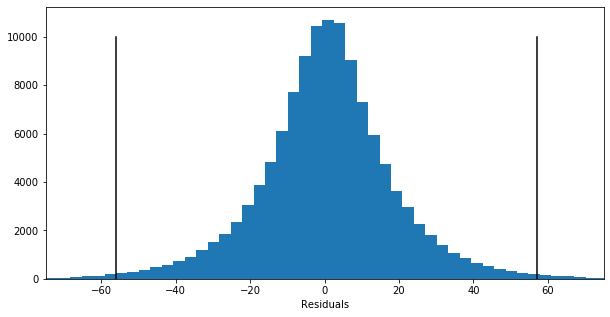

In [13]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
LCL = np.mean(residuals)- 3*np.std(residuals)
UCL = np.mean(residuals)+ 3*np.std(residuals)
ax = plt.hist(residuals,bins=100)
plt.xlim(-75,75)
plt.xlabel('Residuals')
plt.plot([LCL,LCL],[0,10000],"k-")
plt.plot([UCL,UCL],[0,10000],"k-")

# To make zero each pixel that doesn't fit in upper and lower control limits.

In [14]:
error_patches = []
for i in range(len(residuals)):
    if(residuals[i]>UCL or residuals[i]<LCL):
        error_patches.append(i)

In [15]:
row_indice = []
column_indice = []
for i in range(len(error_patches)):
    column_indice.append(error_patches[i]%350)
    row_indice.append(math.trunc(error_patches[i]/350))

In [16]:
part2_converted = cv2.imread('gray.jpeg',0)
for i in range(len(error_patches)):
    part2_converted[row_indice[i]:row_indice[i]+51,column_indice[i]:column_indice[i]+51][25][25]=0
cv2.imwrite("part2_converted.jpeg",part2_converted)    

True

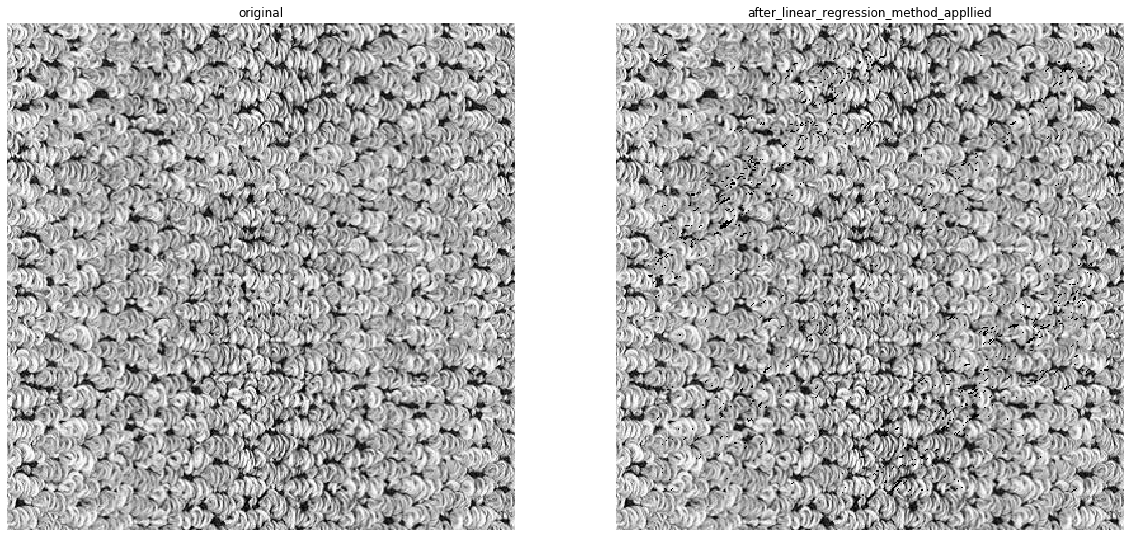

In [17]:
fig = plt.figure(figsize=(20,10))
original_fig = plt.subplot(121)
original_fig.set_title("original")
plt.axis("off")
part2_fig = plt.subplot(122)
part2_fig.set_title("after_linear_regression_method_appllied")
plt.axis("off")
original = cv2.imread("gray.jpeg")
part2 = cv2.imread("part2_converted.jpeg",0)
original_fig.imshow(cv2.cvtColor(original,cv2.COLOR_BGR2RGB))
part2_fig.imshow(cv2.cvtColor(part2,cv2.COLOR_BGR2RGB))
plt.show()